### Wine review project
#### Data mining on wine review dataset from grapes variety all over the world.

- Witch wine should I buy in a supermarket based on grapes variety in Italy?



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys

In [5]:
path = sys.path[0] 
data_path = '/data/winemag-data_first150k.csv'
df=pd.read_csv(path + data_path)

#### Rename Unamed colum to ID column 

In [4]:
df = df.rename(columns = {'Unnamed: 0':'ID'}) # 

In [5]:
df.head(3)

,ID,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


#### Describe numerical values

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150930.0,75464.500000,43569.882402,0.0,37732.25,75464.5,113196.75,150929.0
points,150930.0,87.888418,3.222392,80.0,86.00,88.0,90.00,100.0
price,137235.0,33.131482,36.322536,4.0,16.00,24.0,40.00,2300.0


#### Check witch columns has null-values

In [7]:
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

#### Plot the counts of grape varieties vs country
Plot the counts the occurrences of the counts of different grape varieties for each country of the first 14th countries.


/home/moebius/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.05, 'Different grape varieties for each county (first 10th)')

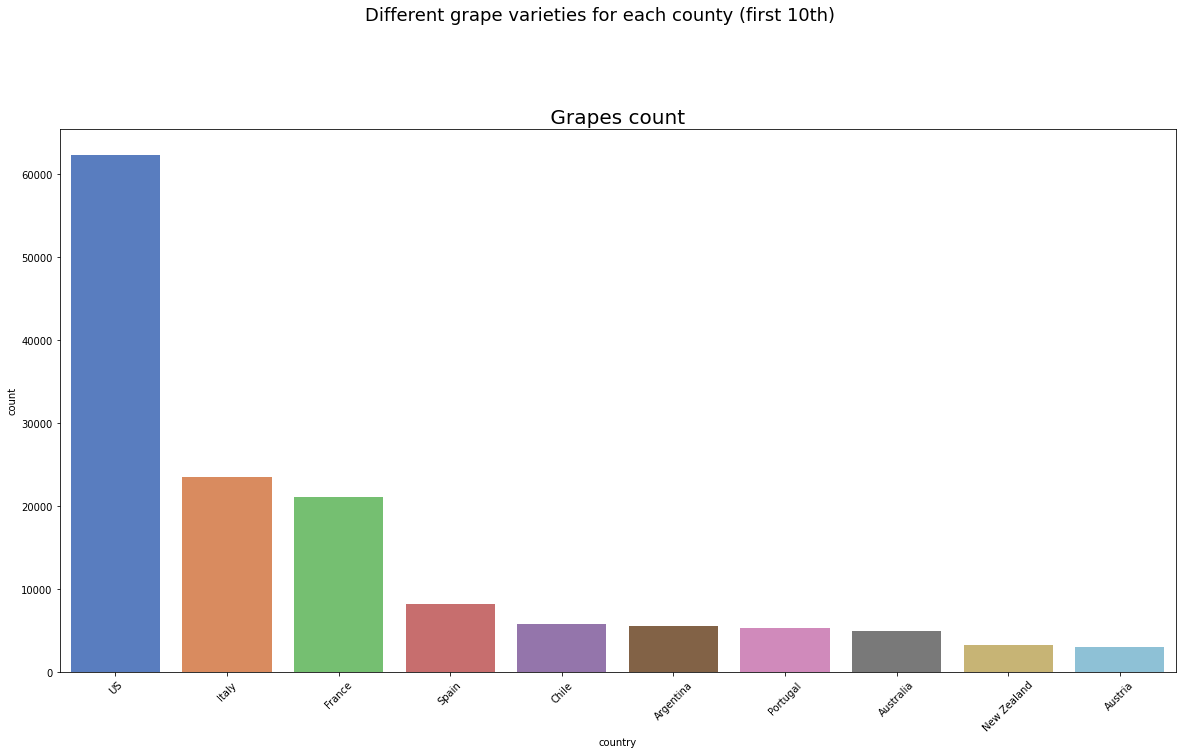

In [30]:
plt.figure( figsize=(20,10))
ax = sns.countplot(df.country, order = df.country.value_counts().index[:10] )     
plt.xticks(rotation=45)
plt.title(" Grapes count ", fontsize=20)
plt.suptitle('Different grape varieties for each county (first 10th)', y=1.05, fontsize=18)


Create a new dataframe called df2 with just the first 14 countries
in the order of the counts of different grape varieties.

In [14]:
order = df['country'].value_counts().index  # extract the index
order = order[:10]                          # take the first 14 values
df2 = df[df.country.isin(order)]            # create new dataframe
df2.country.unique()                        # print out all different countries in the new dataset 

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Argentina',
       'Australia', 'Portugal', 'Chile', 'Austria'], dtype=object)

#### Calculate the score point distribution among all the first 10th countries  who has the most records.

Text(0.5, 1.0, 'Score points distribution among all countries ')

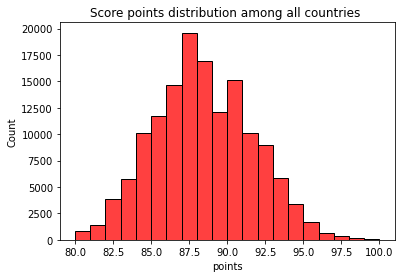

In [15]:
sns.histplot(df2.points, bins = 20 , color ='red')
plt.title("Score points distribution for the quality grapes for the first 10th countries")

#### Calculate the mean price for each of the most important countries and print out it.

In [27]:
gr_df = df2.groupby("country").points.mean()
gr_df2 = df2.groupby("country").points.mean() - min(gr_df2)#- df2.points.mean() # The normalization: ( x - mean )
gr_df2 = gr_df2.sort_values(ascending=False)

/home/moebius/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'This graph shows the wine producers with the highest grape qualities on average.')

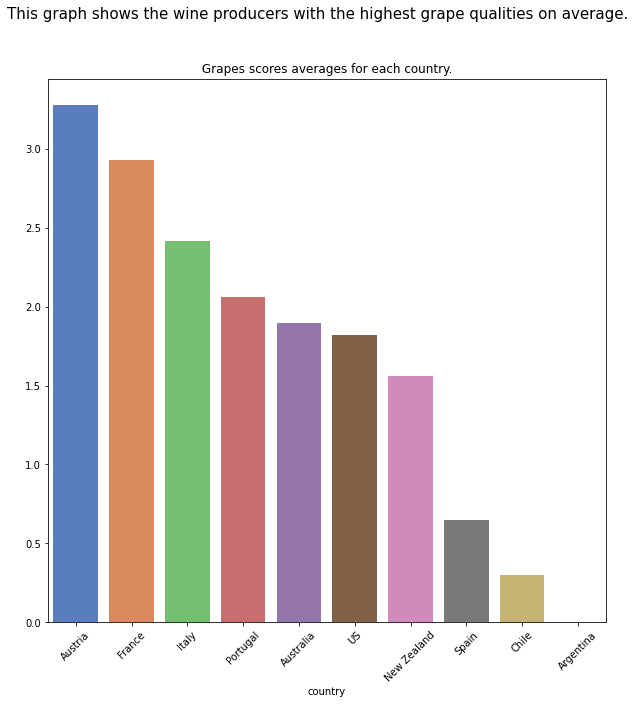

In [34]:
plt.figure( figsize=(10,10) )
sns.set_palette("muted")
sns.barplot(gr_df2.index, gr_df2.values)
plt.xticks(rotation=45)
plt.title(' Grapes scores averages for each country. ',fontsize=12)
plt.suptitle('This graph shows the wine producers with the highest grape qualities on average.', fontsize=15)

### Italy Wine Review Price Analysis

#### Number of unique varieties in Italy

In [74]:
df_ita = df[df['country']=='Italy'] # select the dataframe
print("The number of unique varieties of grapes in Italy is: ",df_ita['variety'].nunique() )

The number of unique varieties of grapes in Italy is:  177


#### Drop all raw with nan value on price column

In [78]:
df_ita.dropna(subset=['price'],inplace=False).head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio


#### Mean price in euro for italian wine

In [79]:
print(" mean price of an Italian wine: ", round(df_ita.price.mean(),2) , " euro ")

 mean price of an Italian wine:  37.55  euro 


#### Counts the occurrences records for each italian region.
The first row should be: Tuscany  7086

In [80]:
var=df_ita.groupby('variety')
varind=var.count().sort_values(by='price',ascending=False).head(40).index
province_of_italy = df_ita[df_ita.variety.isin(varind)]
province_of_italy.province.value_counts()

Tuscany               7086
Piedmont              3981
Veneto                3897
Sicily & Sardinia     2162
Northeastern Italy    1605
Southern Italy        1257
Central Italy         1215
Lombardy               556
Italy Other             43
Northwestern Italy       7
Name: province, dtype: int64

### Feature engineering
Create a new dataframe in witch I divide each wine
in 4 different price range: low, middle, high, luxury.

The range are taken without any prior consideration.

- low     <= 20
- middle  > 20   and  < 35
- high    > 35   and  < 50
- luxury  > 50

#### Group by variety and select points and price columns 

In [81]:
df_ita = df_ita.groupby('variety')['points','price'].mean() 

<ipython-input-81-aebbc44df43f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ita = df_ita.groupby('variety')['points','price'].mean()


In [82]:
df_ita.loc[df_ita['price'] <=20 , 'cost'] = 'low'
df_ita.loc[(df_ita['price'] >20)&(df_ita['price'] <= 35) , 'cost'] = 'middle'
df_ita.loc[(df_ita['price'] >35)&(df_ita['price'] <= 50) , 'cost'] = 'high'
df_ita.loc[df_ita['price'] >50 , 'cost'] = 'luxury'

#### Counts grape varieties

In [83]:
df_ita.cost.value_counts()

middle    75
low       57
high      29
luxury    14
Name: cost, dtype: int64

In [84]:
df_ita.sort_values(by='points',ascending=False, inplace=True) # sort values by points
df_ita.head(3)

,points,price,cost
variety,,,
Sirica,93.000000,36.500000,high
Roviello,92.500000,28.000000,middle
Cabernet Franc,92.016393,84.745098,luxury


In [132]:
def normalization(df):
    """ 
    generate a new score from points / price 
    and after, normalize all in a range score of [0,100]
    """
    new_df = pd.DataFrame()
    new_df['rateo'] = df['points'] / df['price']
    new_df['cost'] = df['cost']
    MAX = new_df['rateo'].max()
    new_df['score'] = (( new_df['rateo'] ) / MAX ) * 100
    new_df.sort_values( by='score' , ascending=False , inplace=True)
    new_df['price']=df['price']
    return new_df

#### Show the score of quality points / prices

In [133]:
plot_df_ita = normalization(df_ita)

#### Low price grapes

In [134]:
plot_ita_low = plot_df_ita.copy()
myfilter = plot_df_ita['cost']=='low'
plot_ita_low.where(myfilter,inplace=True)
plot_ita_low.dropna(subset=['cost'],inplace=True)
plot_ita_low.head(1)

,rateo,cost,score,price
variety,,,,
Pigato,10.5,low,100.0,8.0


#### Middle price grapes

In [135]:
plot_ita_middle = plot_df_ita.copy()
myfilter = plot_df_ita['cost']=='middle'
plot_ita_middle.where(myfilter,inplace=True)
plot_ita_middle.dropna(subset=['cost'],inplace=True)
plot_ita_middle.head(1)

,rateo,cost,score,price
variety,,,,
Falanghina,4.314581,middle,41.091245,20.083333


#### High price grapes

In [136]:
plot_ita_high = plot_df_ita.copy()
myfilter = plot_df_ita['cost']=='high'
plot_ita_high.where(myfilter,inplace=True)
plot_ita_high.dropna(subset=['cost'],inplace=True)
plot_ita_high.head(1)

,rateo,cost,score,price
variety,,,,
Sirica,2.547945,high,24.266145,36.5


#### Luxury price grapes

In [227]:
plot_ita_luxury = plot_df_ita.copy()
myfilter = plot_df_ita['cost']=='luxury'
plot_ita_luxury.where(myfilter,inplace=True)
plot_ita_luxury.dropna(subset=['cost'],inplace=True)
plot_ita_luxury.head(1)

,rateo,cost,score,price
variety,,,,
Trebbiano-Malvasia,1.748792,luxury,16.655164,51.75


In [328]:
def plot_grapes(df, plot_first=10,color_style="dark"):
    # Pre process
    df=df.sort_values(by=['score'], ascending=False)
    newdf = df.iloc[:plot_first]
    newdf.score = newdf.score - min(newdf.score)
    
    # Set style
    plt.figure( figsize=(12,8) )
    sns.set(style=color_style, context="talk")
    lables_ = [str(i) for i in list(df.score)]
    sns.set_palette("husl")
    
    # Plot
    ax=sns.barplot(newdf.index, newdf.score, hue = newdf.cost, palette="rocket")

    ax.set(title='Distribution of Passengers;)# label each bar in histogram')
    for p in ax.patches:
        height = p.get_height() # get the height of each bar
         # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
        s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
        ha = 'center') # sets horizontal alignment (ha) to center
            
    plt.xticks( rotation = 75 )
    plt.title('Best wine grapes founded based on the quality points and their price from the highest score to the lowest')

/home/moebius/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/moebius/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


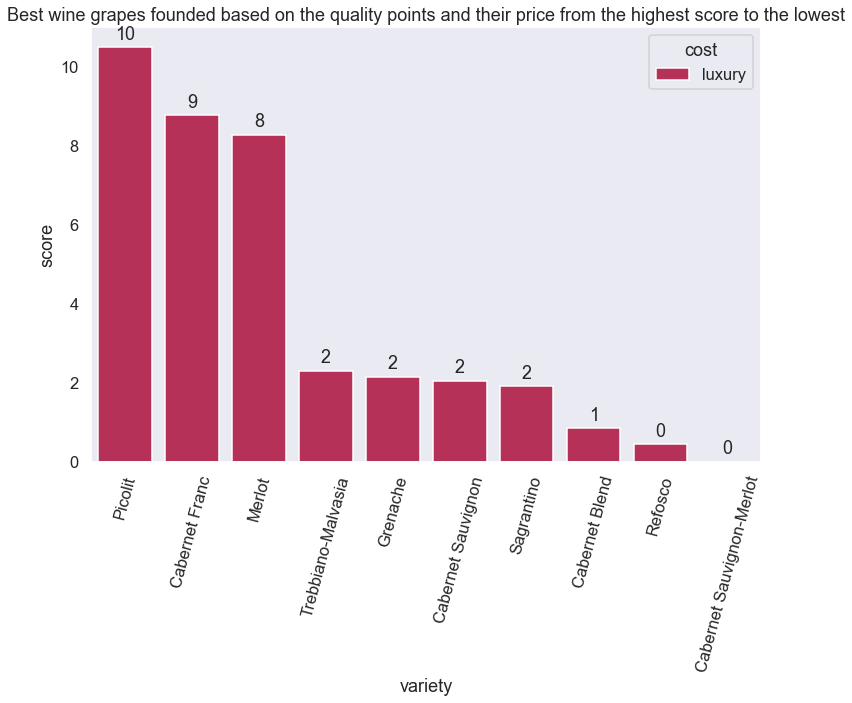

In [329]:
plot_grapes(plot_ita_luxury, 10,'dark')

/home/moebius/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/moebius/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


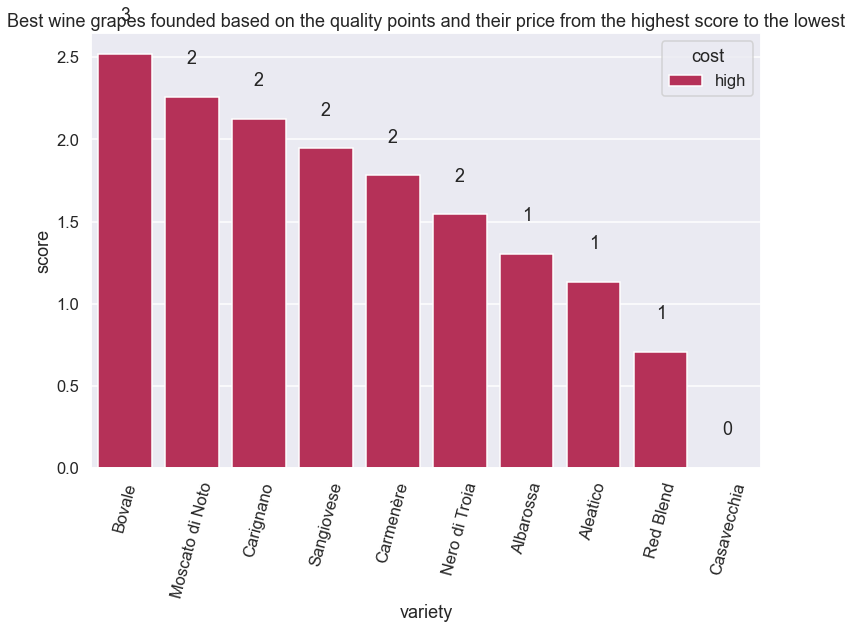

In [330]:
plot_grapes(plot_ita_high, 10,'darkgrid')

/home/moebius/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/moebius/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


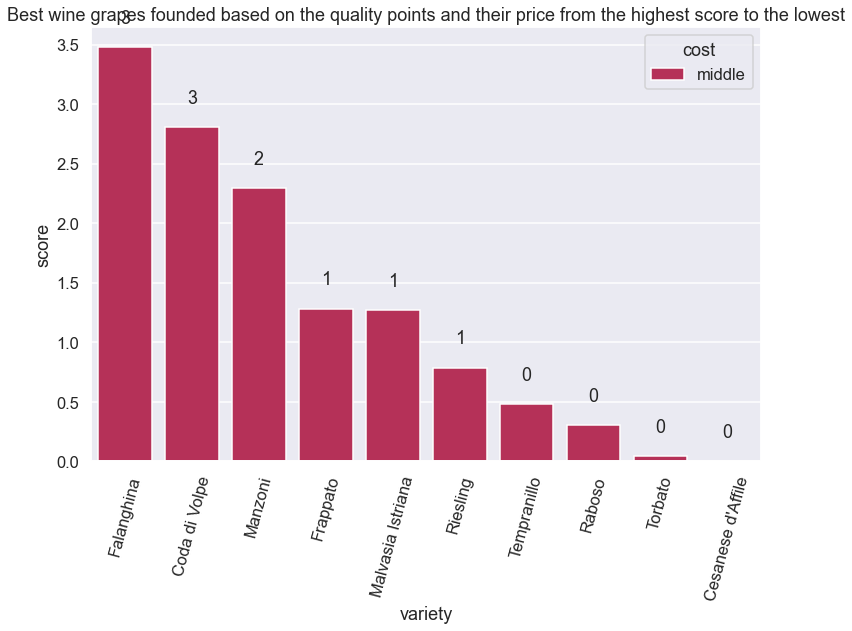

In [331]:
plot_grapes(plot_ita_middle, 10,'darkgrid')

/home/moebius/.local/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/moebius/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


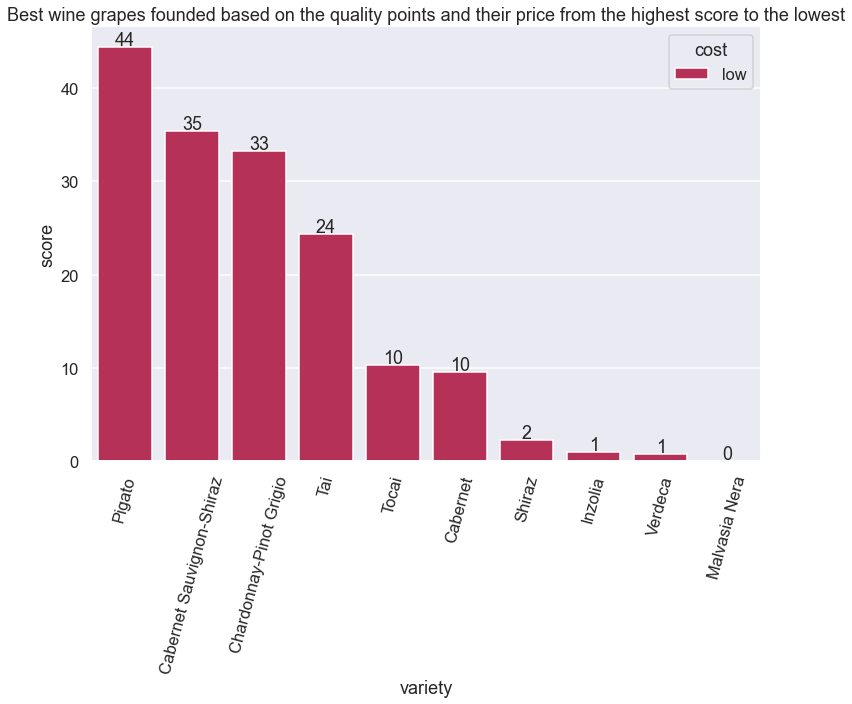

In [332]:
plot_grapes(plot_ita_low, 10,'darkgrid')